### Data

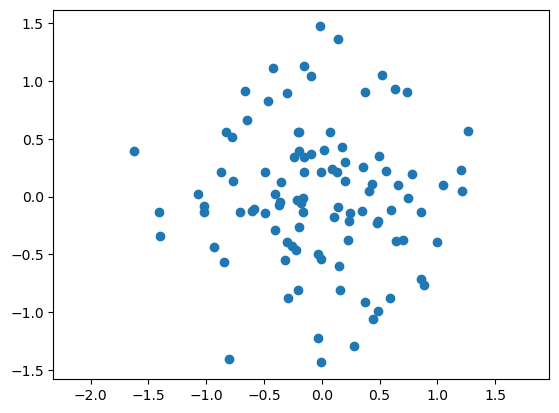

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn import svm

# Generate non-linearly separable data
X, y = make_circles(n_samples=100, noise=0.3, factor=0.4)

# Plot the data
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()


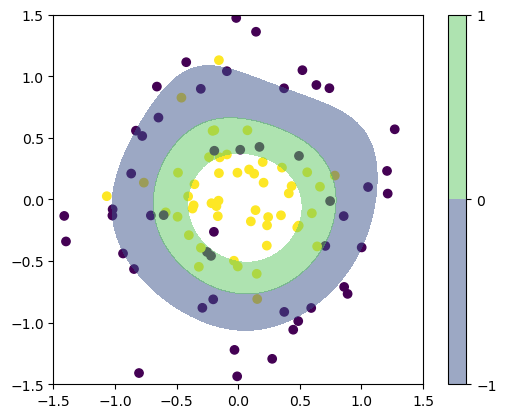

In [54]:
# Create SVM with Gaussian RBF kernel
svm = svm.SVC(kernel='rbf')

# Fit the SVM to the data
svm.fit(X, y)

# Plot the decision boundary and the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

# Create a meshgrid of the feature space
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary as a filled contour plot
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, cmap='viridis')
plt.colorbar()

# Set the axis limits and aspect ratio
plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

In [55]:
# Calculate accuracy on the training data
accuracy = svm.score(X, y)

print("Accuracy:", accuracy)

Accuracy: 0.85


### Variate standard deviation and sigma

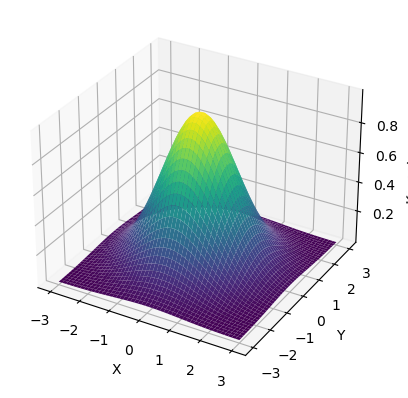

In [56]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', gamma=0.4)

sigma = 1 / np.sqrt(2 * clf.gamma)
desviacion_estandar = sigma


def gaussian_kernel(x, y, gamma):
    return np.exp(-gamma * np.linalg.norm(x-y)**2)

X = np.linspace(-3, 3, 50)
Y = np.linspace(-3, 3, 50)
Z = np.zeros((50, 50))

for i, x in enumerate(X):
    for j, y in enumerate(Y):
        Z[i, j] = gaussian_kernel(np.array([x, y]), np.array([0, 0]), clf.gamma)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(X, Y)

ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Kernel value')
plt.show()



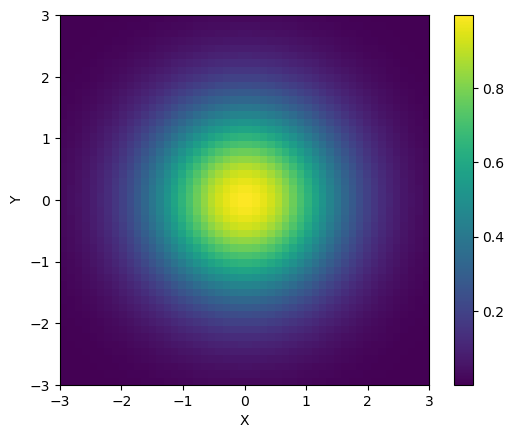

In [57]:
plt.imshow(Z, extent=[-3, 3, -3, 3], origin='lower', cmap='viridis')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

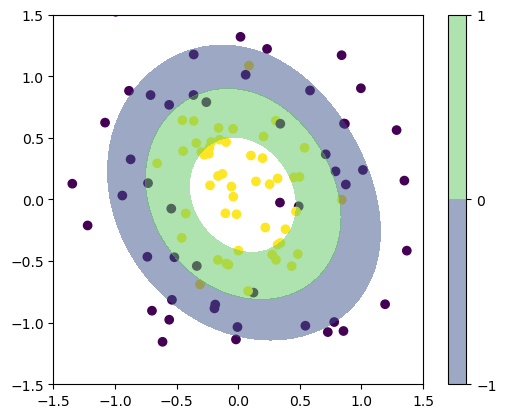

In [58]:
# Generate non-linearly separable data
X, y = make_circles(n_samples=100, noise=0.3, factor=0.4)

# Fit the SVM to the data
clf.fit(X, y)

# Plot the decision boundary and the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

# Create a meshgrid of the feature space
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary as a filled contour plot
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, cmap='viridis')
plt.colorbar()

# Set the axis limits and aspect ratio
plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

In [59]:
# Calculate accuracy on the training data
accuracy = clf.score(X, y)

print("Accuracy:", accuracy)

Accuracy: 0.89


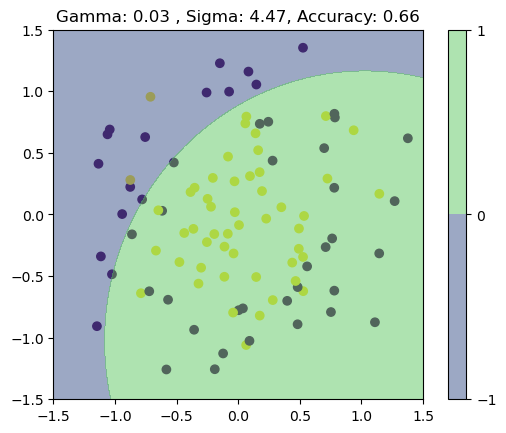

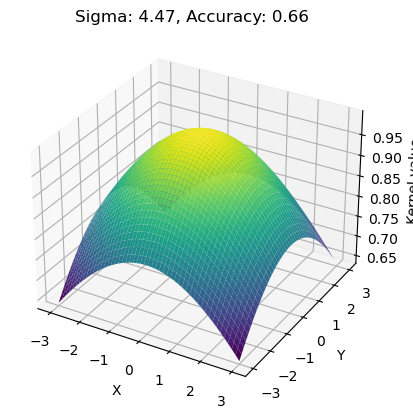

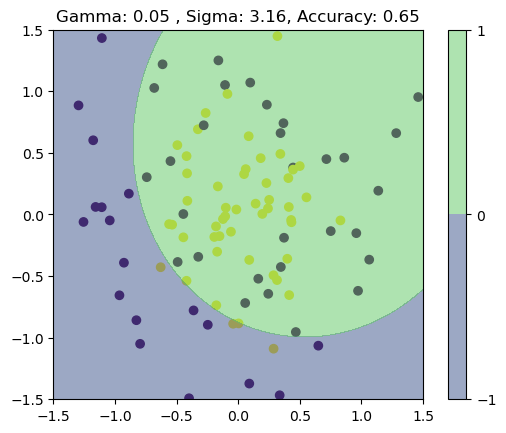

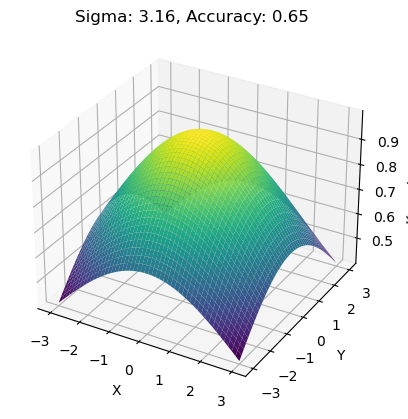

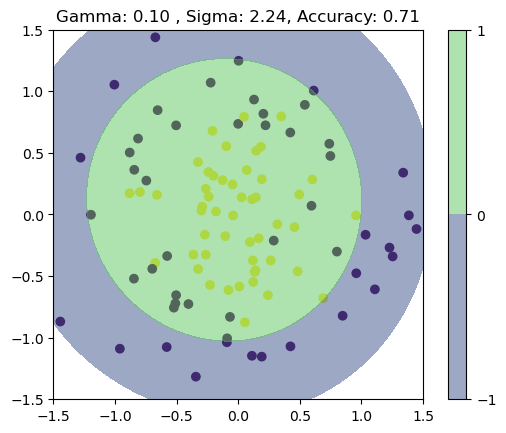

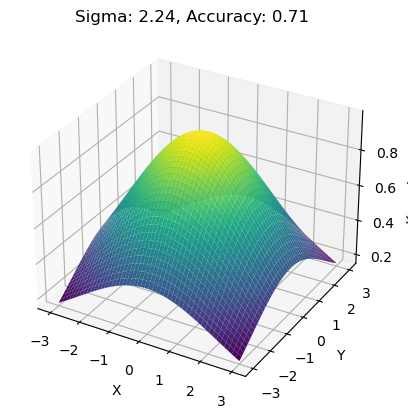

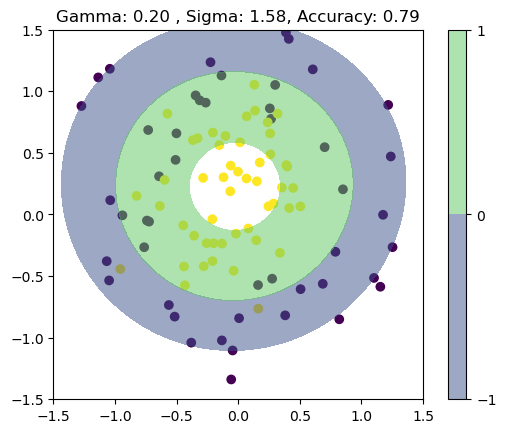

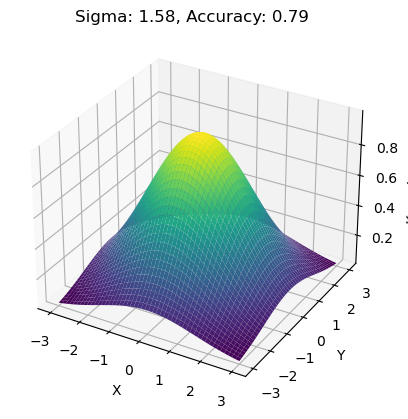

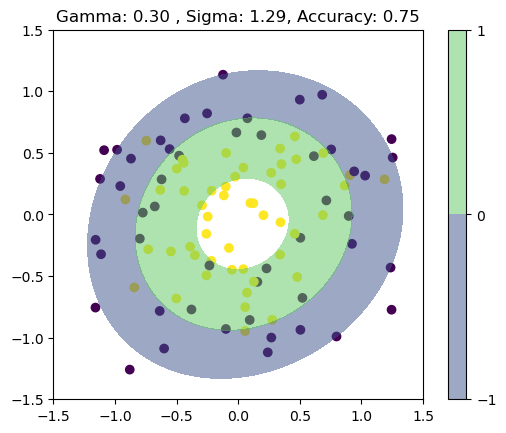

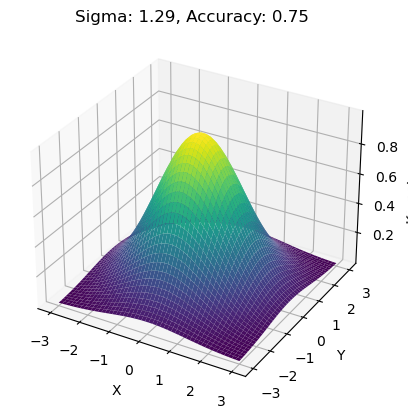

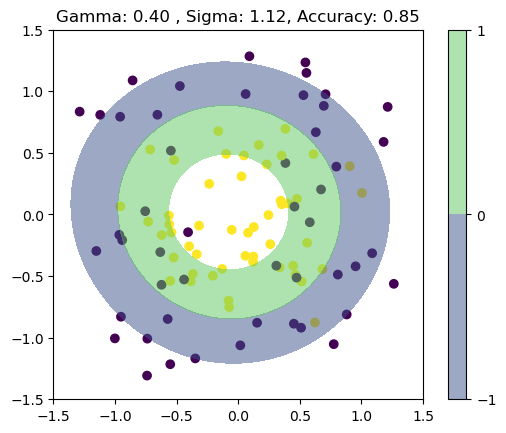

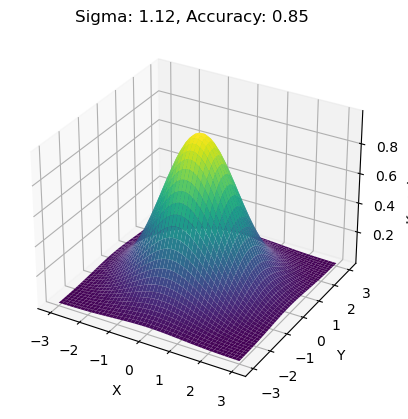

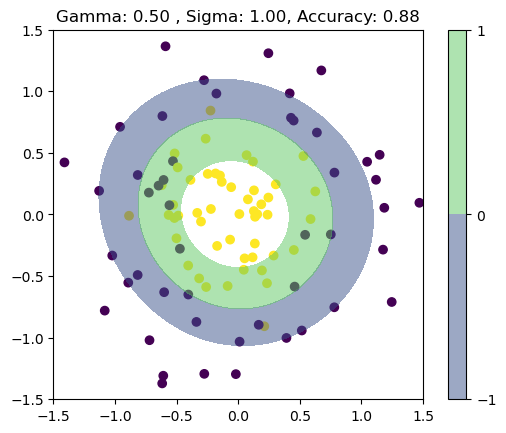

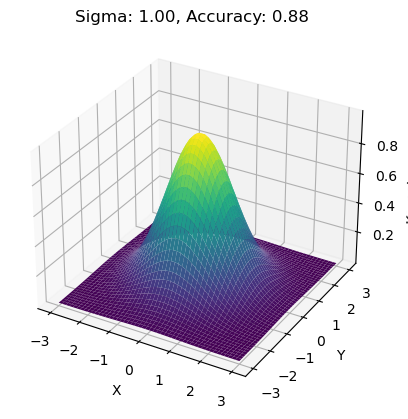

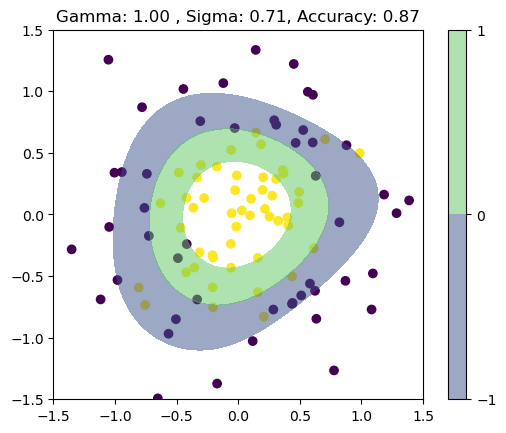

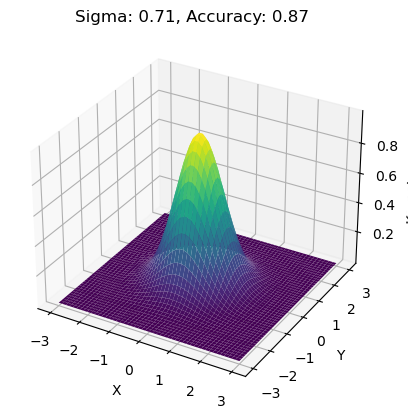

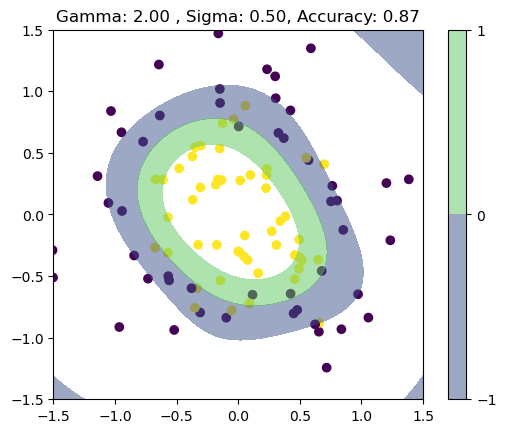

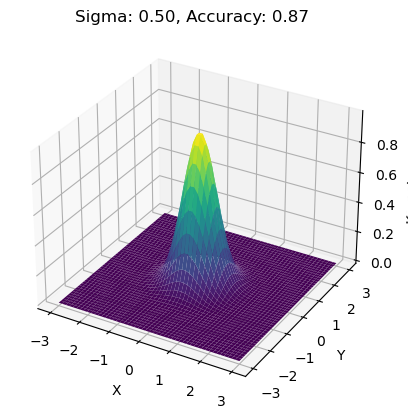

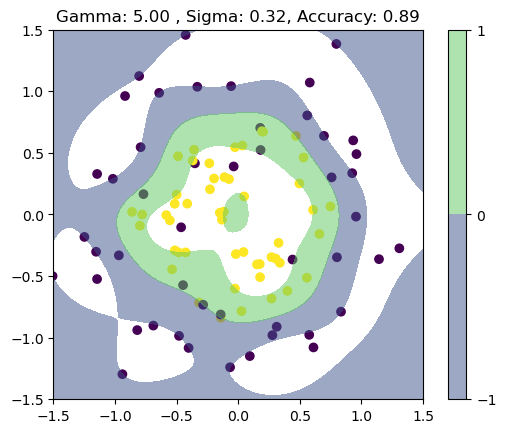

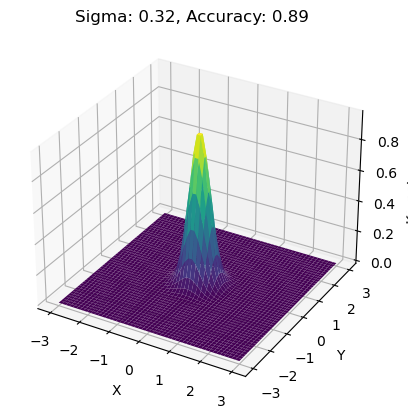

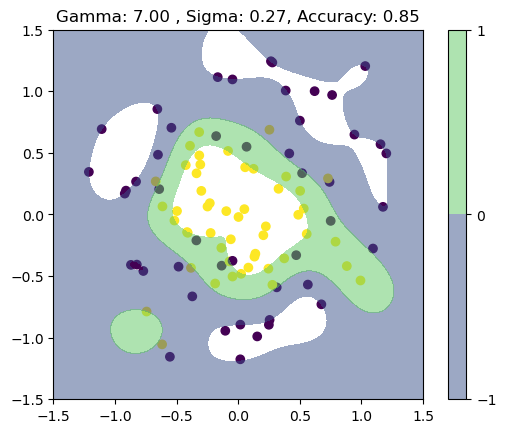

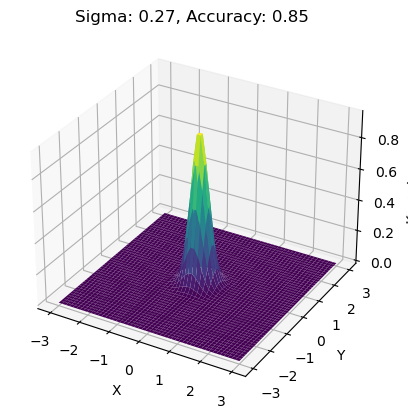

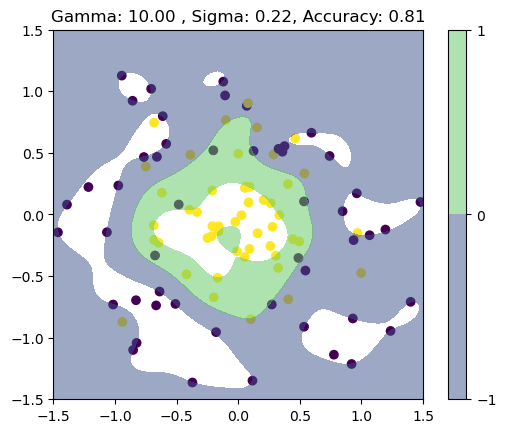

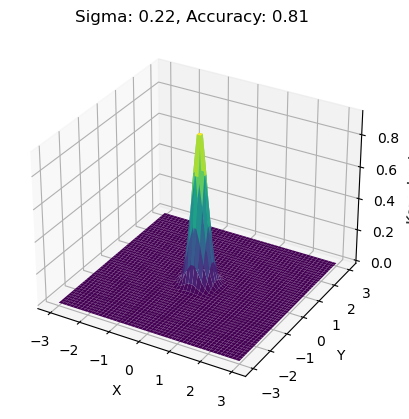

In [88]:
def gaussian_kernel(x, y, gamma):
    return np.exp(-gamma * np.linalg.norm(x-y)**2)

# Crear lista vacía para almacenar los frames del video
frames = []
gamma_values= [0.025 ,0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 5, 7, 10]

# Iterar sobre diferentes valores de gamma y generar las imágenes correspondientes
for gamma in gamma_values:
    
    # Generate non-linearly separable data
    X, y = make_circles(n_samples=100, noise=0.3, factor=0.4)

    # Crear un clasificador SVC con kernel RBF y el valor de gamma actual
    clf = svm.SVC(kernel='rbf', gamma=gamma)

    # Fit the SVM to the data
    clf.fit(X, y)

        # Plot the decision boundary and the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

    # Create a meshgrid of the feature space
    xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary as a filled contour plot
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, cmap='viridis')
    plt.colorbar()

    # Set the axis limits and aspect ratio
    plt.xlim((-1.5, 1.5))
    plt.ylim((-1.5, 1.5))
    sigma = 1 / np.sqrt(2 * clf.gamma)
    accuracy = clf.score(X, y)
    plt.title('Gamma: {:.2f} , Sigma: {:.2f}, Accuracy: {:.2f}'.format(gamma, sigma, accuracy))
    plt.gca().set_aspect('equal', adjustable='box')

    # Show the plot
    # Guardar la imagen con el valor de gamma actual
    plt.savefig('svm_gamma_{}.jpg'.format(gamma))
    plt.show()

    
    X = np.linspace(-3, 3, 50)
    Y = np.linspace(-3, 3, 50)
    Z = np.zeros((50, 50))

    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            Z[i, j] = gaussian_kernel(np.array([x, y]), np.array([0, 0]), clf.gamma)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    X, Y = np.meshgrid(X, Y)

    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Kernel value')
    # Guardar la imagen con el valor de gamma actual
    plt.title('Sigma: {:.2f}, Accuracy: {:.2f} '.format(sigma, accuracy))
    plt.savefig('kernel_gamma_{}.jpg'.format(gamma))
    plt.show()

In [89]:
from PIL import Image

# Crear una lista con los valores de gamma
gamma_values = [0.025 ,0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 5, 7, 10]

# Obtener las dimensiones de las imágenes
img_size = None
for gamma in gamma_values:
    img_svm = Image.open(f'svm_gamma_{gamma}.jpg')
    img_kernel = Image.open(f'kernel_gamma_{gamma}.jpg')
    if img_size is None:
        img_size = img_svm.size
    assert img_svm.size == img_size and img_kernel.size == img_size, \
        f"Las imágenes para gamma={gamma} no tienen las mismas dimensiones"
        
# Crear una nueva imagen combinada para cada par de imágenes
for i, gamma in enumerate(gamma_values[:-1]):
    img_svm1 = Image.open(f'svm_gamma_{gamma}.jpg')
    img_kernel1 = Image.open(f'kernel_gamma_{gamma}.jpg')
    img_svm2 = Image.open(f'svm_gamma_{gamma_values[i+1]}.jpg')
    img_kernel2 = Image.open(f'kernel_gamma_{gamma_values[i+1]}.jpg')

    # Crear una nueva imagen con el doble de ancho y el alto de la imagen 1
    new_img = Image.new('RGB', (img_size[0]*2, img_size[1]))

    # Pegar la imagen SVM de gamma1 en la parte izquierda de la nueva imagen
    new_img.paste(img_svm1, (0, 0))

    # Pegar la imagen kernel de gamma1 a la derecha de la imagen SVM de gamma1
    new_img.paste(img_kernel1, (img_size[0], 0))

    # Pegar la imagen SVM de gamma2 a la derecha de la imagen kernel de gamma1
    new_img.paste(img_svm2, (img_size[0]*2, 0))

    # Pegar la imagen kernel de gamma2 a la derecha de la imagen SVM de gamma2
    new_img.paste(img_kernel2, (img_size[0]*3, 0))

    # Guardar la nueva imagen combinada
    new_img.save(f'combined_image_{gamma}.jpg')

In [90]:
import cv2
import glob

# Obtener la lista de imágenes combinadas
image_files = glob.glob('combined_image_*.jpg')
image_files.sort()

# Leer la primera imagen para obtener sus dimensiones
img = cv2.imread(image_files[0])
height, width, layers = img.shape

# Crear el objeto VideoWriter
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter('combined_images.mp4', fourcc, 1, (width, height))

# Iterar sobre las imágenes y escribirlas en el video
for image_file in image_files:
    img = cv2.imread(image_file)
    video.write(img)

# Liberar recursos
cv2.destroyAllWindows()
video.release()
